Using TensorFlow backend.


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


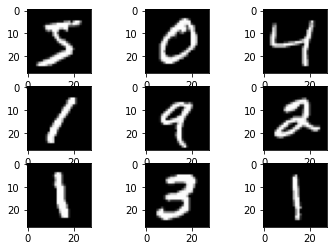

In [1]:
# example of loading the mnist dataset
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [2]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

def plot_nine(data):
    for i in range(9):
        # define subplot
        plt.subplot(330 + 1 + i)
        # add noise to image
        # plot raw pixel data
        plt.imshow(data[i], cmap=plt.get_cmap('gray'))

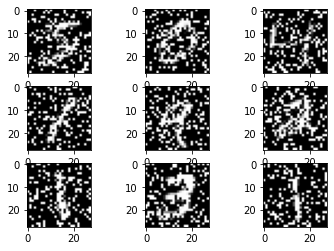

In [3]:
NOISE_LEVEL = 0.20

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # add noise to image
    noise_img = sp_noise(trainX[i],NOISE_LEVEL)
    # plot raw pixel data
    plt.imshow(noise_img, cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [4]:
# CLEAN IMAGES AS TARGETS
train_Y = copy.copy(trainX)
test_Y = copy.copy(testX)
print(train_Y.shape, test_Y.shape, sep='\n')

(60000, 28, 28)
(10000, 28, 28)


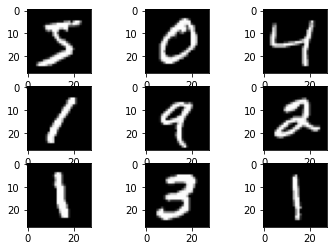

In [5]:
# DOUBLE CHECK TARGETS:
plot_nine(train_Y)

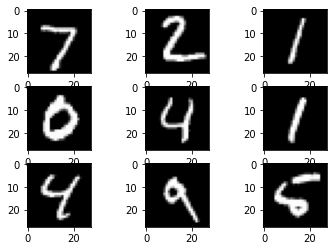

In [6]:
# DOUBLE CHECK TARGETS:
plot_nine(test_Y)

In [7]:
# FLATTEN THE IMGS
train_Y = train_Y.reshape(train_Y.shape[0],train_Y.shape[1]*train_Y.shape[2])
test_Y = test_Y.reshape(test_Y.shape[0],test_Y.shape[1]*test_Y.shape[2])
print(train_Y.shape, test_Y.shape, sep='\n')

(60000, 784)
(10000, 784)


In [8]:
# NOISY INPUT SIGNAL/IMAGES
def process_data(data):
    lst = []
    for x in data:
        lst.append(sp_noise(x,NOISE_LEVEL))
    return np.array(lst)

test_X = process_data(testX)
train_X = process_data(trainX)

print(train_X.shape, test_X.shape, sep='\n')

(60000, 28, 28)
(10000, 28, 28)


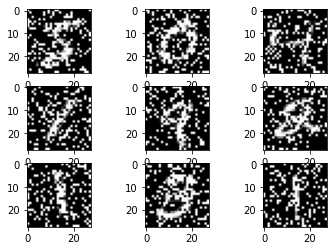

In [9]:
# DOUBLE CHECK INPUTS:
plot_nine(train_X)

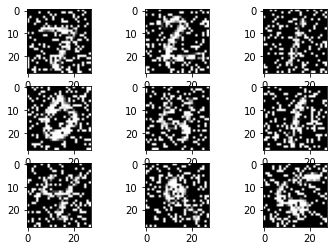

In [10]:
# DOUBLE CHECK INPUTS:
plot_nine(test_X)

In [11]:
# FLATTEN THE INPUT IMGS
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1]*train_X.shape[2])
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1]*test_X.shape[2])
print(train_X.shape, test_X.shape, sep='\n')

(60000, 784)
(10000, 784)


In [12]:
## FLOAT CONVERSION

# convert from integers to floats
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_Y = train_Y.astype('float32')
test_Y = test_Y.astype('float32')
# normalize to range 0-1
train_X = train_X / 255.0
test_X = test_X / 255.0
train_Y = train_Y / 255.0
test_Y = test_Y / 255.0

In [13]:
from SAE import Stacked_AEC
mode = 'Identity' #'LS'
dir_name = 'results'
# mode = 'LS'
########################################################
# MODEL PARAMS
epoch = 20
# rate = 1e-5
rate = 1e-4
depth = 4
opt = 'SGD'
SAE = Stacked_AEC(dir_name, mode)

Creating dir results
results already exist


Starting training NN with 1 layer...
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.1893 - val_loss: 0.1860
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.1830 - val_loss: 0.1798
Epoch 3/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.1770 - val_loss: 0.1740
Epoch 4/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.1713 - val_loss: 0.1685
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.1660 - val_loss: 0.1632
Epoch 6/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.1609 - val_loss: 0.1583
Epoch 7/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.1561 - val_loss: 0.1536
Epoch 8/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.1515 - val_loss: 0.1492
Epoch 9/20
60000/60000 [==============================] - 2s 31us/step - 

60000/60000 [==============================] - 6s 101us/step - loss: 0.0565 - val_loss: 0.0562
Epoch 16/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0563 - val_loss: 0.0561
Epoch 17/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0562 - val_loss: 0.0559
Epoch 18/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0560 - val_loss: 0.0557
Epoch 19/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0558 - val_loss: 0.0556
Epoch 20/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0557 - val_loss: 0.0554
4 layers are trained, adding final layer and fine-tuning all the 5 layers
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.0555 - val_loss: 0.0552
Epoch 2/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.0553 - val_loss: 0.0550
Epoch 3/20
60000/60000 [==========

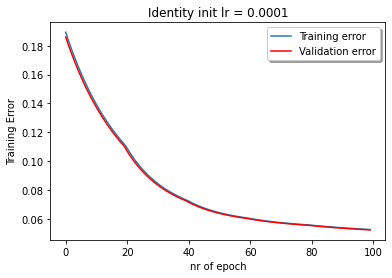

In [14]:
SAE.fit(train_X=train_X, train_y=train_Y, 
        test_X=test_X, test_y=test_Y, 
        depth=depth, 
        epochs=epoch, 
        lr_rate=rate, 
        batch_size=100, 
        opti=opt, 
        loss='mse')

In [15]:
# pred = SAE.model.predict(np.expand_dims(train_X[0], axis=0))
preds = SAE.model.predict(test_X)
print(preds.shape)
preds = preds.reshape(preds.shape[0],28,28)
print(preds.shape)


(10000, 784)
(10000, 28, 28)


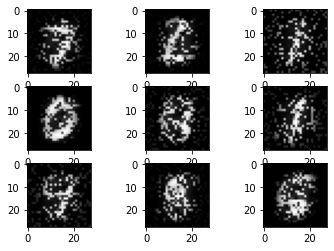

In [16]:
# PREDICTED IMAGES
plot_nine(preds)
# plot_nine(test_X.reshape(test_X.shape[0], 28, 28))
# plot_nine(train_X.reshape(train_X.shape[0], 28, 28))

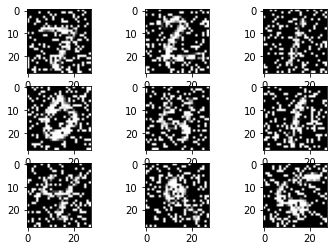

In [17]:
# INPUT IMAGES
plot_nine(test_X.reshape(test_X.shape[0], 28, 28))

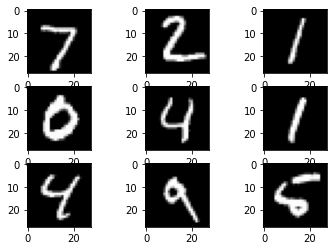

In [18]:
# INPUT TARGET IMGS
plot_nine(test_Y.reshape(test_X.shape[0], 28, 28))